In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [2]:
actual_data = pd.read_csv("scenario/case-04/data/150-test-actual.csv")

predict_data = pd.read_csv("scenario/case-04/data/150-test-ft-process.csv")

actual_data = actual_data[["incorrect", "incomplete", "inconsistent"]]
predict_data = predict_data[["incorrect", "incomplete", "inconsistent"]]

In [3]:
for column in actual_data.columns:
    cm = confusion_matrix(actual_data[column], predict_data[column])

    precision = precision_score(actual_data[column], predict_data[column])
    recall = recall_score(actual_data[column], predict_data[column])
    f1 = f1_score(actual_data[column], predict_data[column])
    accuracy = accuracy_score(actual_data[column], predict_data[column])

    print(f"========== {column}:")
    print(cm)
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1: {f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print()

========== incorrect:
[[  1  12]
 [  0 137]]
Precision: 0.919
Recall: 1.000
F1: 0.958
Accuracy: 0.920

========== incomplete:
[[  0  29]
 [  0 121]]
Precision: 0.807
Recall: 1.000
F1: 0.893
Accuracy: 0.807

========== inconsistent:
[[98  0]
 [52  0]]
Precision: 0.000
Recall: 0.000
F1: 0.000
Accuracy: 0.653



/Users/nghiempt/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


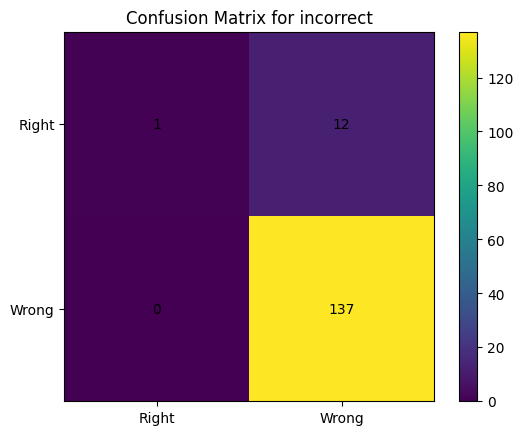

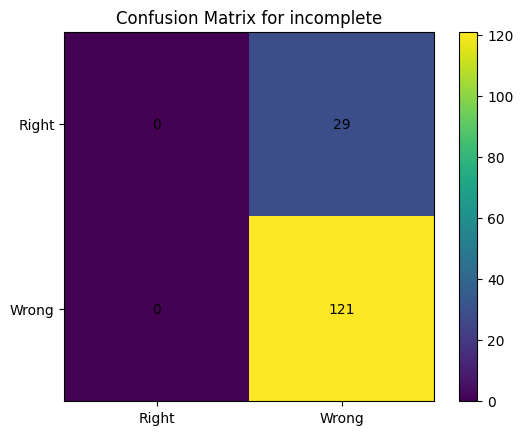

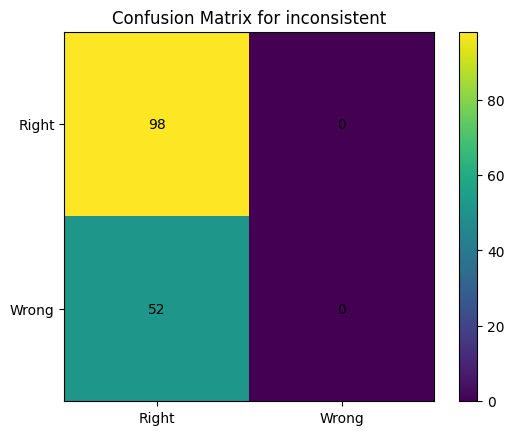

In [4]:
def plot_confusion_matrix(cm, title):
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()

    classes = ['Right', 'Wrong']
    plt.xticks(range(len(classes)), classes)
    plt.yticks(range(len(classes)), classes)

    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i, j], ha='center', va='center')

    plt.show()

for column in actual_data.columns:
    cm = confusion_matrix(actual_data[column], predict_data[column])
    plot_confusion_matrix(cm, f"Confusion Matrix for {column}")